In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import jax.numpy as jnp

import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data

In [2]:
import jax

In [3]:
size= 200
n_epoches = 8
x_shifts = np.zeros(n_epoches)
x_0 = np.linspace(0,1,size)
y = np.zeros((n_epoches,size))

x = np.empty((n_epoches,size))
for i in range(n_epoches):
    x[i,:] = x_0

In [4]:
n = 256

loss_1 = wobble_loss.L2Loss()
model  = wobble_model.JnpLin(n,y,x,x_shifts)

In [5]:
loss_2 = wobble_loss.L2Reg()

In [6]:
loss = loss_1 + loss_2

In [7]:
loss_3 = loss + wobble_loss.L2Loss()

In [8]:
loss_4 = 100 * loss_3

In [9]:
model.optimize(loss,maxiter=4)

      fun: array(0.)
 hess_inv: <256x256 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

In [10]:
loss = (100*wobble_loss.L2Reg(constant=1.0)) + wobble_loss.L2Loss()

In [11]:
model.optimize(loss,maxiter=4)

      fun: array(793.71911621)
 hess_inv: <256x256 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.12805176e-03,  4.19616699e-04,  3.81469727e-05, -6.91413879e-04,
        1.49726868e-03,  1.14345551e-03, -9.29832458e-04,  4.19616699e-04,
       -5.38349152e-04, -1.41096115e-03,  1.11150742e-03, -4.11033630e-04,
       -7.20977783e-04,  1.73711777e-03,  7.52449036e-04, -1.03473663e-03,
        4.29153442e-04, -9.51290131e-04, -1.52111053e-04,  1.34754181e-03,
       -4.00543213e-04, -6.44207001e-04,  1.53303146e-03, -1.56879425e-04,
       -6.21795654e-04,  3.62396240e-05, -6.28948212e-04,  3.89099121e-04,
        1.57642365e-03, -6.82830811e-04, -9.63211060e-05,  9.67502594e-04,
       -1.50918961e-03, -3.43322754e-05,  2.09808350e-05, -9.11235809e-04,
        1.18875504e-03,  1.71852112e-03, -1.23071671e-03,  5.13553619e-04,
        3.09467316e-04, -3.02934647e-03,  2.94685364e-04,  4.32968140e-04,
       -1.10530853e-03,  1.61361694e-03,  1.45959854e-03, -1.29842758e-03

In [12]:
tbl     = at.QTable.read('data/hat-p-20.fits')
dataset = wobble_data.AstroDataset(tbl['flux'],tbl['wavelength'],tbl['mask'],tbl['flux_err'])
dataset.interpolate_mask()
dataset.gauss_filter(sigma=80)
x, y, y_err = dataset.get_xy(subset=(0,400))

x_shifts = wobble_data.getInitXShift(tbl['BJD'],'HAT-P-20','APO')

loss_1 = wobble_loss.L2Loss()
model  = wobble_model.JnpLin(512,y,x,x_shifts)

In [13]:
model.optimize(loss_1,maxiter=8)

      fun: array(527.04119873)
 hess_inv: <512x512 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.63419950e-03,  2.32053176e-02,  2.75951065e-02,  2.94705145e-02,
        4.52575684e-02,  7.46500492e-02,  6.83898628e-02,  5.79979606e-02,
        2.43124664e-02,  8.03161785e-03, -1.45863928e-02, -1.69994012e-02,
        4.32388298e-03,  2.83027440e-03, -2.08261237e-03, -4.11176495e-03,
        3.82420048e-03, -2.49591097e-03, -1.16563551e-02, -4.86039370e-03,
        5.38918376e-03, -3.50037217e-03, -4.54963744e-03, -1.17178857e-02,
       -7.20924884e-03, -8.32199305e-03, -4.29144129e-03, -1.71022378e-02,
        2.23596208e-03, -3.59119475e-03, -1.49647295e-02, -2.35401094e-03,
       -6.67979941e-03, -1.00983318e-03,  7.83530995e-04, -4.24166396e-03,
       -1.17896497e-03, -2.93942541e-03, -7.82223418e-04, -4.34622169e-04,
        4.15426120e-03,  1.43828243e-03, -9.44005884e-03,  1.12174526e-02,
       -2.39310414e-03, -1.06808357e-03, -9.00844857e-03,  1.69764422e-02

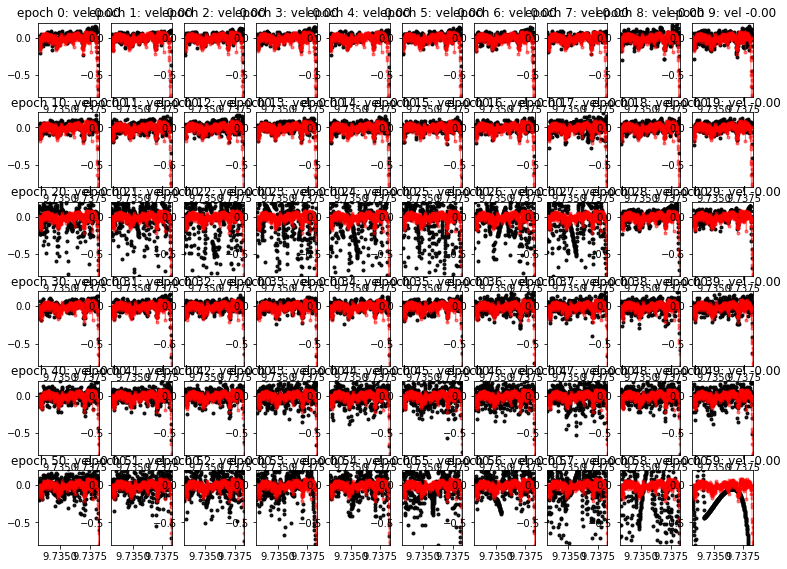

In [14]:
model.plot()